# Ex. No: 05
#  Implementation of filter

**Name:** Karan A   **Reg. No:** 212223230099

## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- 19AI406-Digital Image Processing Techincs 

- EVEN SEM ( Slot: 4D1-1 & 4K1-1)

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Read the input image
image = cv2.imread('cat3.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

* Convolution in OpenCV

In [75]:
# Syntex 
# dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

In [76]:
# Define a Kernel
kernel = np.ones((5,5), dtype = np.float32) / 5**2

print (kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


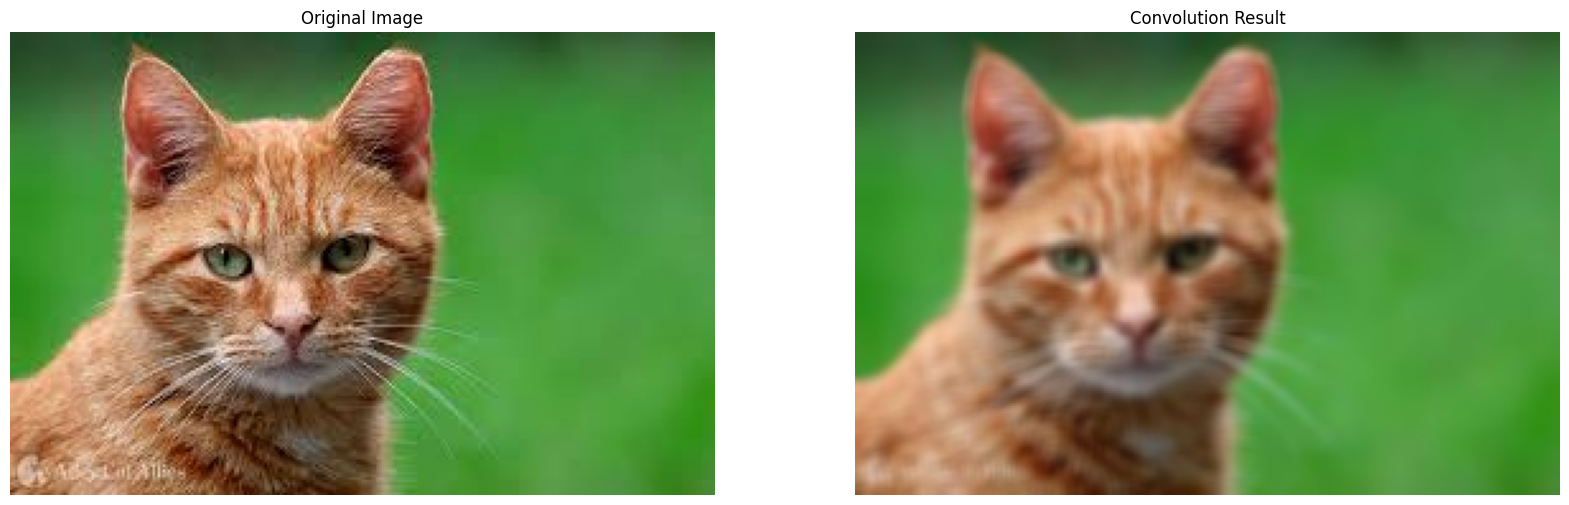

In [77]:
# To Perform Convolution 
image = cv2.imread('cat3.jpeg')

dst = cv2.filter2D(image, ddepth = -1, kernel = kernel)

plt.figure(figsize = [20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(image[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.axis('off'); plt.imshow(dst[:,:,::-1]);   plt.title("Convolution Result");

# 1. Smoothing filter 
-by convolving the image with a 5x5 kernel

# i) Using Averaging Filter

In [78]:
# Syntex 
# dst = cv2.blur(src, ksize[, dst[, anchor[, borderType]]])

In [79]:
average_filter = cv2.blur(image, (5,5))

Text(0.5, 1.0, 'Output Image ( Average Filter)')

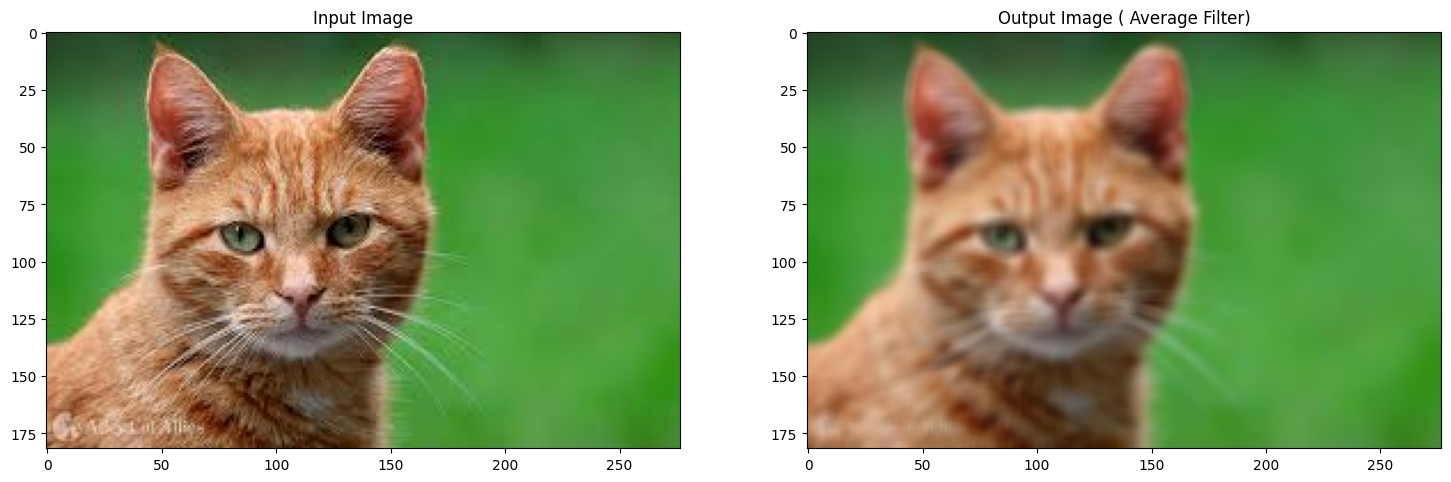

In [80]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(average_filter[:, :, ::-1]); plt.title('Output Image ( Average Filter)')

# ii) Using Weighted Averaging Filter (custom kernel)   
-  The middle pixel gets the maximum weight while the pixels farther away are given less weight.

- The Gaussian filter follows a specific mathematical distribution (the Gaussian function), while the weighted averaging filter can use arbitrary weights.

In [81]:
# Syntex 
# dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

In [82]:
kernel = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])/16
weighted_average_filter = cv2.filter2D(image, -1, kernel)

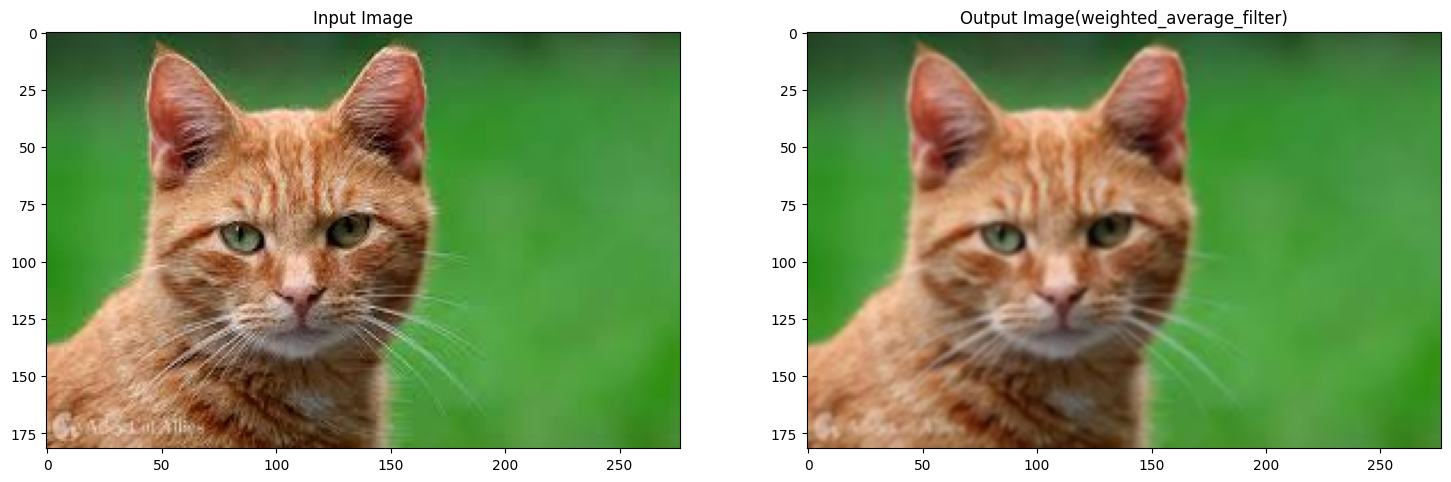

In [83]:
# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121);plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122);plt.imshow(weighted_average_filter[:, :, ::-1]); plt.title('Output Image(weighted_average_filter)');plt.show()

In [84]:
# Apply Gaussian blur.
gaussian_filter = cv2.GaussianBlur(image, (29,29), 0, 0)

Text(0.5, 1.0, 'Output Image ( Gaussian Filter)')

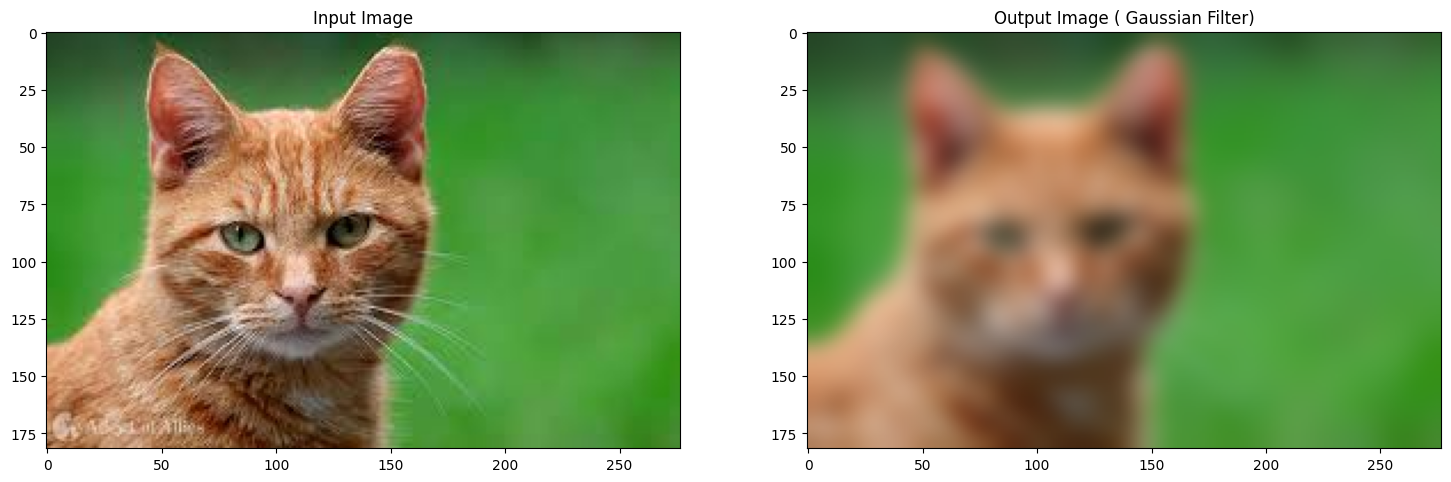

In [85]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(gaussian_filter[:, :, ::-1]); plt.title('Output Image ( Gaussian Filter)')

In [86]:
# iv) Using Median Filter
median_filter = cv2.medianBlur(image, 9)

-  median filter is often used for removing salt-and-pepper noise (random black-and-white pixels) in an image. It is effective at preserving edges while smoothing out the noise.

Text(0.5, 1.0, 'Output Image ( Median_filter)')

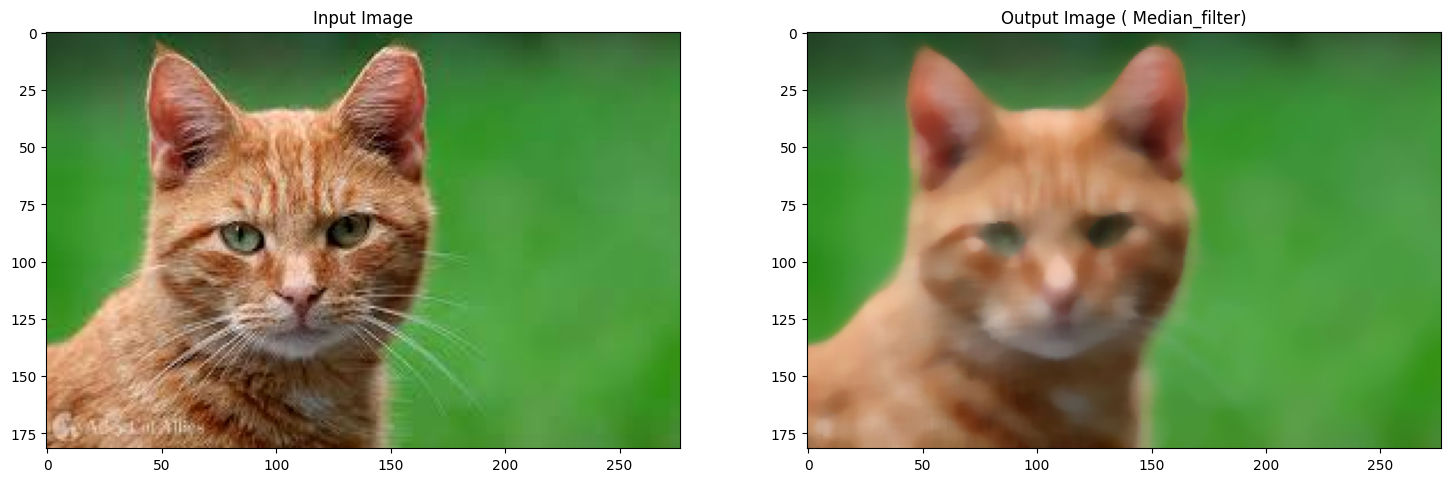

In [87]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(median_filter[:, :, ::-1]); plt.title('Output Image ( Median_filter)')

# 2. Sharpening Filters

In [88]:
# i) Using Laplacian Kernel (Manual Kernel)
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])
sharpened_laplacian_kernel = cv2.filter2D(image, -1, kernel = laplacian_kernel)

Text(0.5, 1.0, 'Output Image ( Laplacian_filter)')

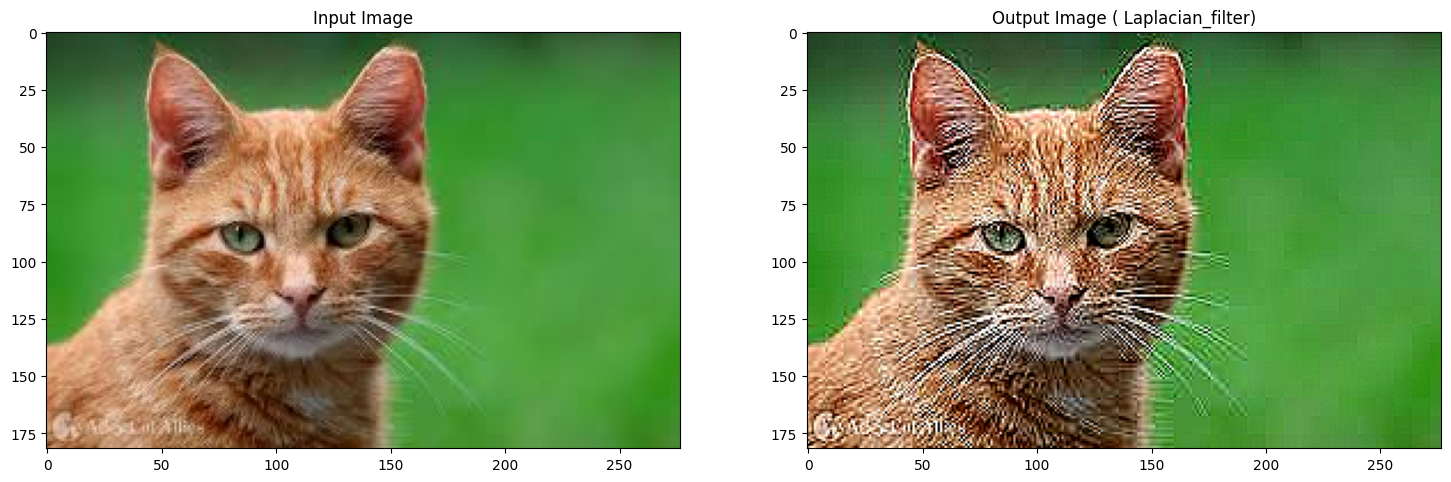

In [89]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(sharpened_laplacian_kernel[:, :, ::-1]); plt.title('Output Image ( Laplacian_filter)')

In [90]:
# ii) Using Laplacian Operator (OpenCV built-in)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
laplacian_operator = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_operator = np.uint8(np.absolute(laplacian_operator))

Text(0.5, 1.0, 'Output Image ( Laplacian_filter)')

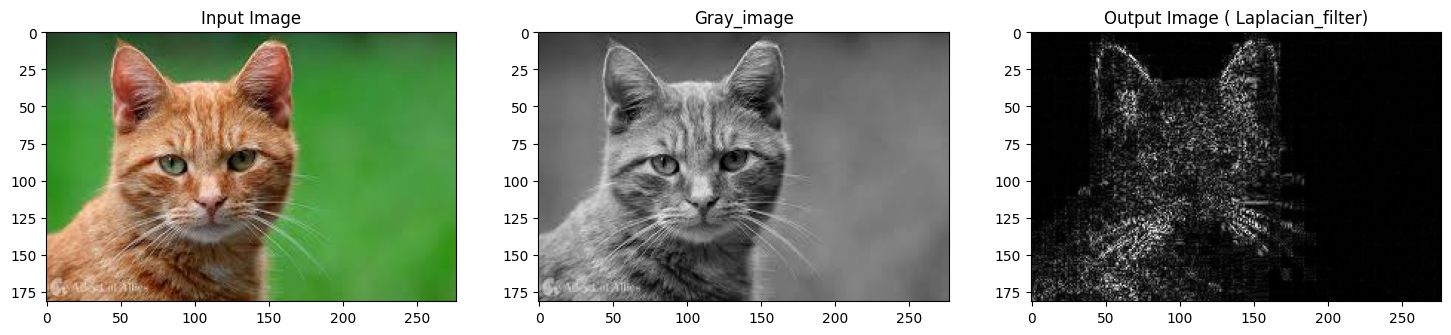

In [91]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(131); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(132); plt.imshow(gray_image, cmap='gray'); plt.title('Gray_image')
plt.subplot(133); plt.imshow(laplacian_operator,cmap='gray'); plt.title('Output Image ( Laplacian_filter)')

# Pencil Sketch Filter

# Pencil Sketch Filter

In [92]:
def plot(img1, img2):
    
    fig = plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Filtered Image")

    plt.show()

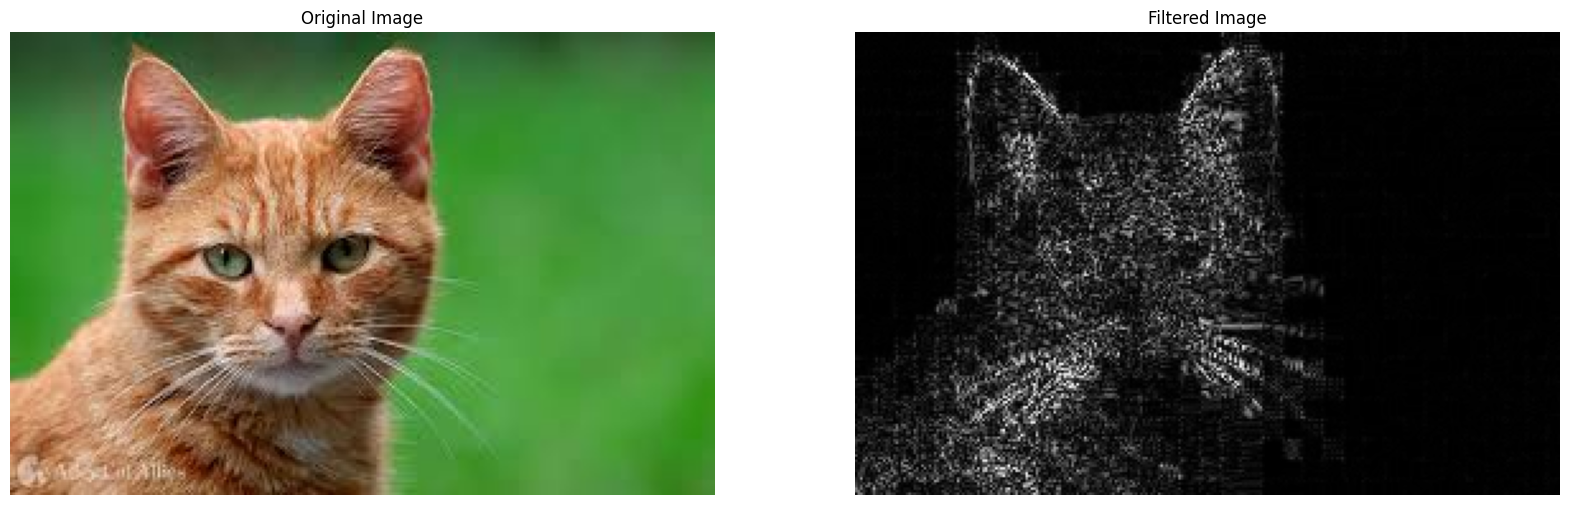

In [93]:
plot(image,laplacian_operator)